In [1]:
# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def confusion_matrix_visualization(model_name, color_seq):
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2, in
              zip(group_names, group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot = labels, fmt = '' , cmap = color_seq)

    ax.set_title('Confusion Matrix for ' + model_name + ' Classifier')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()


In [3]:
# Importing datasets
df = pd.read_csv("csv_result.csv")

xx = df['Result'].value_counts().reset_index()
print(xx)

   index  Result
0      1    6157
1     -1    4898


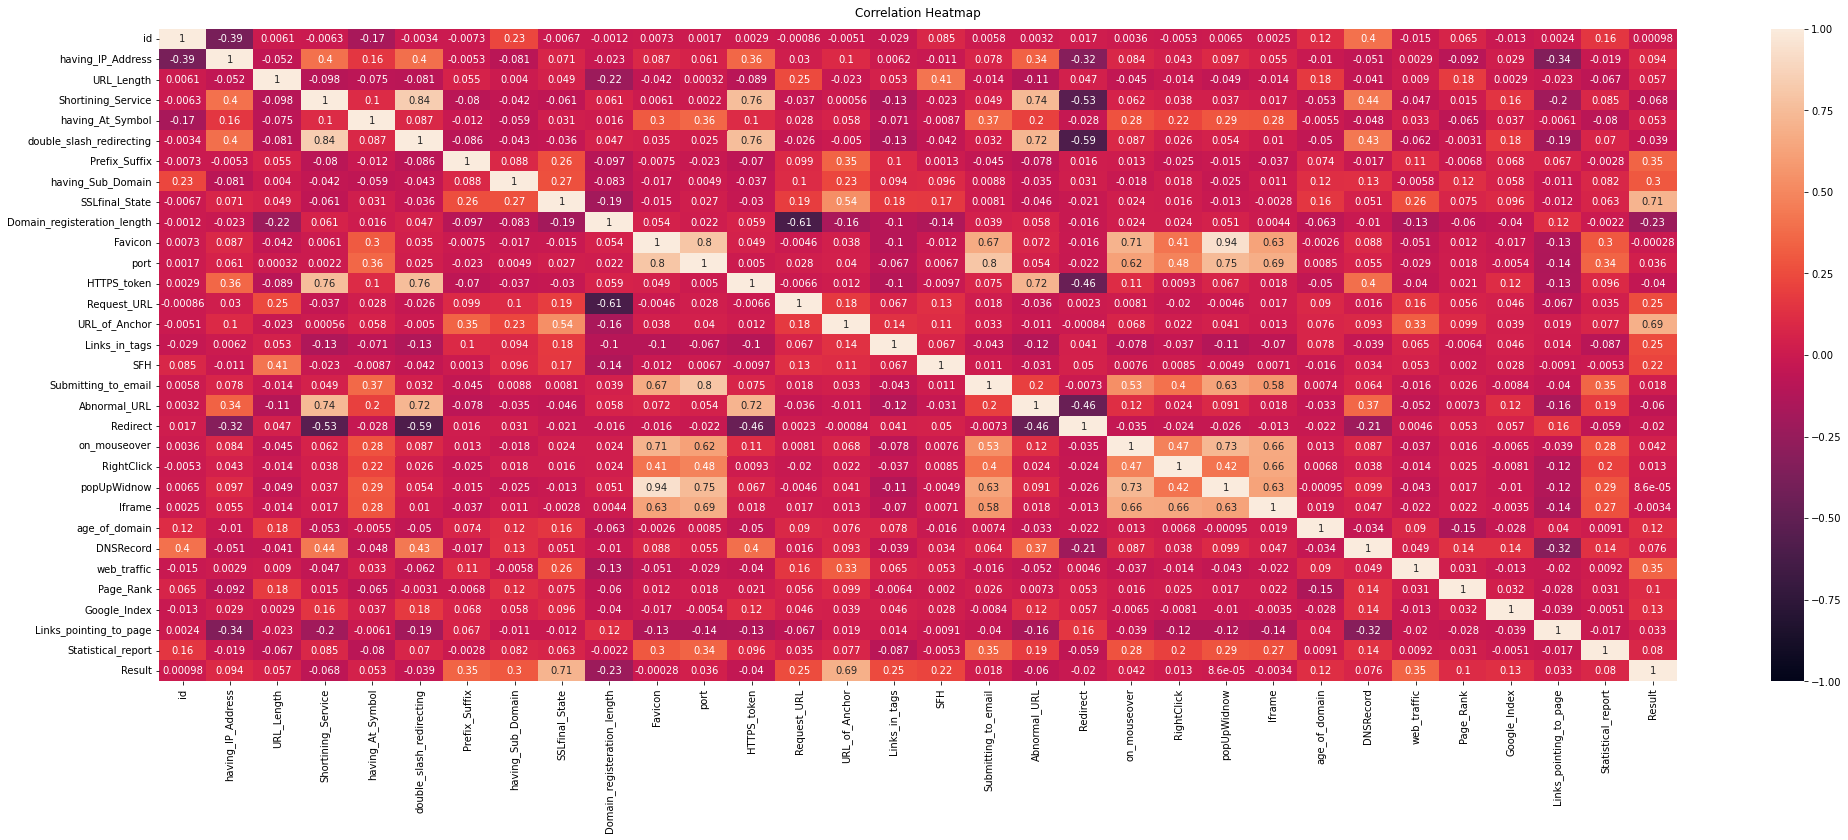

In [4]:
# Correlation Heatmap
plt.figure(figsize=(34, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [5]:
# Declaring dependent and independent variable
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

# Splitting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [6]:
# ....Training Logistic Regression model..... 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

Logistic Regression Classifier model

Confusion Matrix for Logistic Regression Classifier model
 [[1341  157]
 [  99 1720]]


Accuracy Score for Logistic Regression Classifier model
 0.9228218269520652


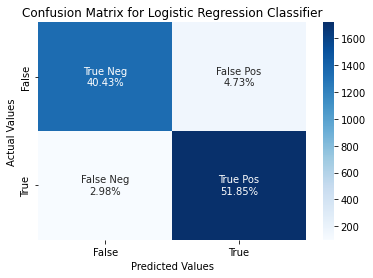

Train Score Logistic Regression: 0.9322822434737659
Test Score Logistic Reegression: 0.9228218269520652

K-Fold Cross Validation
Accuracy: 93.09 %
Standard Deviation: 0.52 %


In [8]:
# Confusion matrix for Logistic Regression Classifier
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Logistic Regression Classifier model\n")
print("Confusion Matrix for Logistic Regression Classifier model\n", cm)
print("\n\nAccuracy Score for Logistic Regression Classifier model\n", accuracy_score(y_test, y_pred))

confusion_matrix_visualization('Logistic Regression', 'Blues')

print("Train Score Logistic Regression:", classifier.score(X_train,y_train))
print("Test Score Logistic Reegression:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


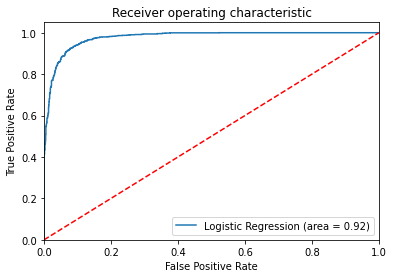

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [10]:
# ....Training K-NN model.... 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

K-NN Classifier model

Confusion Matrix for K-NN Classifier model
 [[1379  119]
 [  87 1732]]


Accuracy Score for K-NN Classifier model
 0.9378956888754899


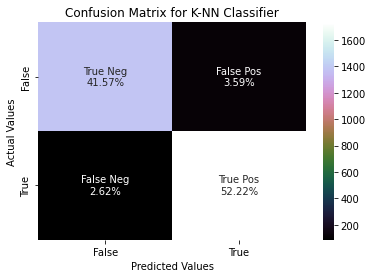

Train Score K-NN: 0.962522615662962
Test Score K-NN: 0.9378956888754899

K-Fold Cross Validation
Accuracy: 93.81 %
Standard Deviation: 0.98 %


In [12]:
# Confusion matrix for K-NN Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("K-NN Classifier model\n")
print("Confusion Matrix for K-NN Classifier model\n",cm)
print("\n\nAccuracy Score for K-NN Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('K-NN', 'cubehelix')

print("Train Score K-NN:", classifier.score(X_train,y_train))
print("Test Score K-NN:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [13]:
# .....Training SVM model.....
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

SVM Classifier model

Confusion Matrix for SVM Classifier model
 [[1339  159]
 [  98 1721]]


Accuracy Score for SVM Classifier model
 0.9225203497135966


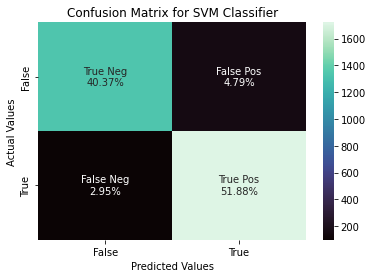

Train Score SVM: 0.9303437580770225
Test Score SVM: 0.9225203497135966

K-Fold Cross Validation
Accuracy: 92.85 %
Standard Deviation: 0.59 %


In [14]:
# Confusion matrix for SVM Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("SVM Classifier model\n")
print("Confusion Matrix for SVM Classifier model\n",cm)
print("\n\nAccuracy Score for SVM Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('SVM', 'mako')

print("Train Score SVM:", classifier.score(X_train,y_train))
print("Test Score SVM:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [15]:
# .....Training Kernel SVM model.....
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [16]:
# Predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

Kernel SVM Classifier model

Confusion Matrix for Kernel SVM Classifier model
 [[1381  117]
 [  70 1749]]


Accuracy Score for kernel SVM Classifier model
 0.9436237564063913


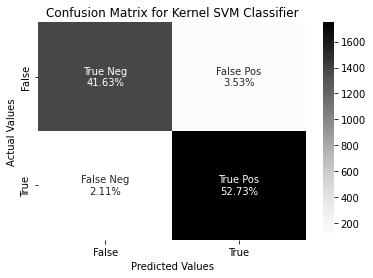

Train Score for Kernel SVM: 0.9537348151977255
Test Score for Kernel SVM: 0.9436237564063913

K-Fold Cross Validation
Accuracy: 94.74 %
Standard Deviation: 0.30 %


In [17]:
# Confusion matrix for Kernel SVM Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Kernel SVM Classifier model\n")
print("Confusion Matrix for Kernel SVM Classifier model\n",cm)
print("\n\nAccuracy Score for kernel SVM Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('Kernel SVM', 'Greys')

print("Train Score for Kernel SVM:", classifier.score(X_train,y_train))
print("Test Score for Kernel SVM:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [18]:
# .....Training Naive Bayes model..... 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

Naive Bayes Classifier model

Confusion Matrix for Naive Bayes Classifier model
 [[1498    0]
 [1287  532]]


Accuracy Score for Naive Bayes Classifier model
 0.6119987940910461


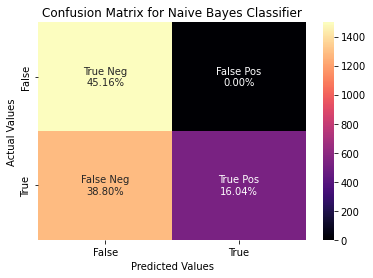

Train Score for Naive Bayes: 0.6001550788317395
Test Score for Naive Bayes: 0.6119987940910461

K-Fold Cross Validation
Accuracy: 59.98 %
Standard Deviation: 0.69 %


In [19]:
# Confusion matrix for Naive Bayes Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Naive Bayes Classifier model\n")
print("Confusion Matrix for Naive Bayes Classifier model\n",cm)
print("\n\nAccuracy Score for Naive Bayes Classifier model\n", accuracy_score(y_test, y_pred))

confusion_matrix_visualization('Naive Bayes', 'magma')

print("Train Score for Naive Bayes:", classifier.score(X_train,y_train))
print("Test Score for Naive Bayes:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [20]:
# .....Training Decision Tree classifier  model..... 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

Decision Tree classifier model

Confusion Matrix for Decision Tree classifier model
 [[1417   81]
 [  42 1777]]


Accuracy Score for Decision Tree classifier model
 0.962918299668375


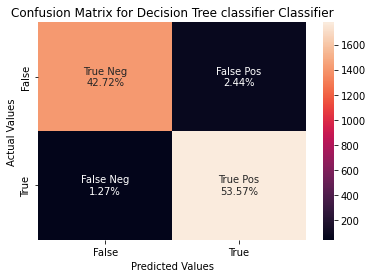

Train Score for Decision Tree: 0.9905660377358491
Test Score for Decision Tree: 0.962918299668375

K-Fold Cross Validation
Accuracy: 95.86 %
Standard Deviation: 0.62 %


In [21]:
# Confusion matrix for Decision Tree classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Decision Tree classifier model\n")
print("Confusion Matrix for Decision Tree classifier model\n",cm)
print("\n\nAccuracy Score for Decision Tree classifier model\n", accuracy_score(y_test, y_pred))

confusion_matrix_visualization('Decision Tree classifier', 'rocket')

print("Train Score for Decision Tree:", classifier.score(X_train,y_train))
print("Test Score for Decision Tree:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



In [22]:
# .....Training Random Forest classifier  model.....
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#predicting test results
y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

Random Forest Classifier Model

Confusion Matrix for Random Forest classifier model
 [[1426   72]
 [  30 1789]]


Accuracy Score for Random Forest classifier model
 0.9692493216762135


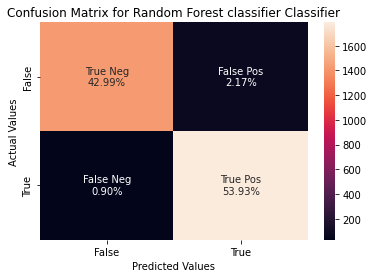

Train Score for Random Forest classifier: 0.9895321788575859
Test Score for Random Forest classifier: 0.9692493216762135

K-Fold Cross Validation
Accuracy: 96.76 %
Standard Deviation: 0.55 %


In [23]:
# Confusion matrix for Random Forest classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Random Forest Classifier Model\n")
print("Confusion Matrix for Random Forest classifier model\n",cm)
print("\n\nAccuracy Score for Random Forest classifier model\n", accuracy_score(y_test, y_pred))

confusion_matrix_visualization('Random Forest classifier', 'rocket')

print("Train Score for Random Forest classifier:", classifier.score(X_train,y_train))
print("Test Score for Random Forest classifier:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [24]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

``````````````````````````````````````````````````````

XGBoost Classifier model

Confusion Matrix for XGBoost Classifier model
 [[1426   72]
 [  30 1789]]


Accuracy Score for XGBoost Classifier model
 0.9692493216762135


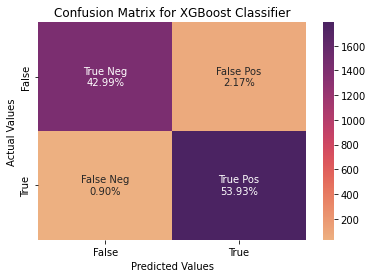

Train Score for XGBoost: 0.9545102093564228
Test Score for XGBoost: 0.9439252336448598

K-Fold Cross Validation
Accuracy: 95.01 %
Standard Deviation: 0.48 %


In [25]:
# Confusion matrix for XGBoost Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("XGBoost Classifier model\n")
print("Confusion Matrix for XGBoost Classifier model\n",cm)
print("\n\nAccuracy Score for XGBoost Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('XGBoost', 'flare')

print("Train Score for XGBoost:", classifier.score(X_train,y_train))
print("Test Score for XGBoost:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



In [26]:
#....Training Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators = 5, 
                           criterion = 'entropy',
                           max_features = 2)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

``````````````````````````````````````````````````````

Extra Tree Classifier model

Confusion Matrix for Extra Tree Classifier model
 [[1426   72]
 [  30 1789]]


Accuracy Score for Extra Tree Classifier model
 0.9692493216762135


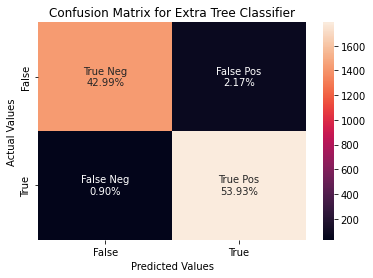

Train Score for Extra Tree: 0.9905660377358491
Test Score for Extra Tree: 0.9617123907145011

K-Fold Cross Validation
Accuracy: 95.94 %
Standard Deviation: 0.69 %


In [27]:
# Confusion matrix for Extra Tree Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Extra Tree Classifier model\n")
print("Confusion Matrix for Extra Tree Classifier model\n",cm)
print("\n\nAccuracy Score for Extra Tree Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('Extra Tree', 'rocket')

print("Train Score for Extra Tree:", classifier.score(X_train,y_train))
print("Test Score for Extra Tree:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [28]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                                n_estimators = 200)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


``````````````````````````````````````````````````````

AdaBoost Classifier model

Confusion Matrix for AdaBoost Classifier model
 [[1369  129]
 [  89 1730]]


Accuracy Score for AdaBoost Classifier model
 0.9342779620138679


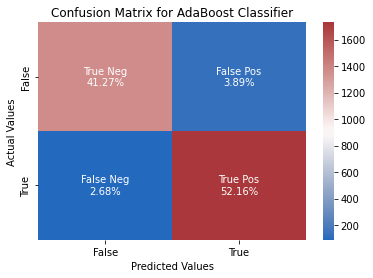

Train Score for AdaBoost: 0.9387438614629103
Test Score for AdaBoost: 0.9342779620138679

K-Fold Cross Validation
Accuracy: 93.81 %
Standard Deviation: 0.76 %


In [29]:
# Confusion matrix for AdaBoost Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("AdaBoost Classifier model\n")
print("Confusion Matrix for AdaBoost Classifier model\n",cm)
print("\n\nAccuracy Score for AdaBoost Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('AdaBoost', 'vlag')

print("Train Score for AdaBoost:", classifier.score(X_train,y_train))
print("Test Score for AdaBoost:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [30]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate = 0.1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

``````````````````````````````````````````````````````

Gradient Boosting Classifier model

Confusion Matrix for Gradient Boosting Classifier model
 [[1392  106]
 [  74 1745]]


Accuracy Score for Gradient Boosting Classifier model
 0.9457340970756708


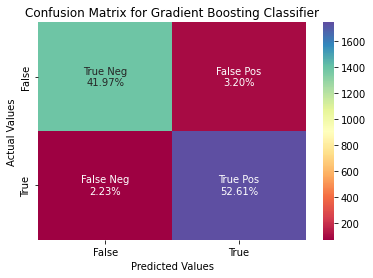

Train Score for Gradient Boosting: 0.9548979064357715
Test Score for Gradient Boosting: 0.9457340970756708

K-Fold Cross Validation
Accuracy: 95.05 %
Standard Deviation: 0.46 %


In [31]:
# Confusion matrix for Gradient Boostingt Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Gradient Boosting Classifier model\n")
print("Confusion Matrix for Gradient Boosting Classifier model\n",cm)
print("\n\nAccuracy Score for Gradient Boosting Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('Gradient Boosting', 'Spectral')

print("Train Score for Gradient Boosting:", classifier.score(X_train,y_train))
print("Test Score for Gradient Boosting:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [32]:
# Light Gradient Boosting Machine Classifier
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


``````````````````````````````````````````````````````

Light Gradient Boosting Machine Classifier model

Confusion Matrix for Light Gradient Boosting Machine Classifier model
 [[1424   74]
 [  50 1769]]


Accuracy Score for Light Gradient Boosting Machine Classifier model
 0.9626168224299065


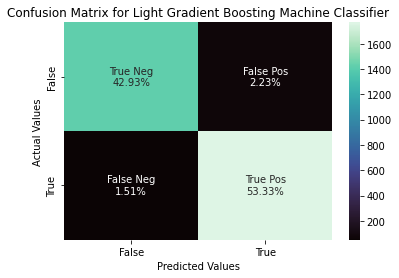

Train Score for Light Gradient Boosting Machine: 0.9803566813130008
Test Score for Light Gradient Boosting Machine: 0.9626168224299065

K-Fold Cross Validation
Accuracy: 96.39 %
Standard Deviation: 0.27 %


In [33]:
# Confusion matrix for Light Gradient Boosting Machine Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Light Gradient Boosting Machine Classifier model\n")
print("Confusion Matrix for Light Gradient Boosting Machine Classifier model\n",cm)
print("\n\nAccuracy Score for Light Gradient Boosting Machine Classifier model\n", accuracy_score(y_test, y_pred)) 

confusion_matrix_visualization('Light Gradient Boosting Machine', 'mako')

print("Train Score for Light Gradient Boosting Machine:", classifier.score(X_train,y_train))
print("Test Score for Light Gradient Boosting Machine:", classifier.score(X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

